# 544 Project 

In [74]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.exceptions import FitFailedWarning
from sklearn.svm import SVC
from sklearn.tree import plot_tree
import requests
from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

## Extracting Weather Data from the web 

In [2]:
njweath = requests.get("https://climate.rutgers.edu/stateclim_v1/nclimdiv/index.php?stn=NJ00&elem=pcpn")

njweather = BeautifulSoup(njweath.content, "html.parser")

In [36]:
rows = []

for row in njweather.find_all("tr"):
    year_tag = row.find("th")
    cells = row.find_all("td")

    if year_tag and len(cells) >= 14:
        year = year_tag.get_text(strip=True)

        def get_cell_text(cell):
          span = cell.find("span")
          text = span.get_text(strip=True) if span else cell.get_text(strip=True)
          return text.replace('*', '')  # Remove any asterisks

        January = get_cell_text(cells[1])
        February = get_cell_text(cells[2])
        March = get_cell_text(cells[3])
        April = get_cell_text(cells[4])
        May = get_cell_text(cells[5])
        June = get_cell_text(cells[6])
        July = get_cell_text(cells[7])
        August = get_cell_text(cells[8])
        September = get_cell_text(cells[9])
        October = get_cell_text(cells[10])
        November = get_cell_text(cells[11])
        December = get_cell_text(cells[12])

        rows.append({
            "Year": year,
            "January": January,
            "February": February,
            "March": March,
            "April": April,
            "May": May,
            "June": June,
            "July": July,
            "August": August,
            "September": September,
            "October": October,
            "November": November,
            "December": December
        })

nj = pd.DataFrame(rows)
nj.tail(20)


,Year,January,February,March,April,May,June,July,August,September,October,November,December
116,2011,3.33,3.07,5.55,5.67,3.77,3.43,4.11,15.67,7.12,4.19,3.83,4.21
117,2012,2.78,1.33,1.65,2.87,4.27,4.30,3.43,4.62,4.45,5.43,1.30,5.56
118,2013,3.00,2.89,2.89,2.60,3.82,9.49,5.27,4.67,2.11,2.01,2.89,4.74
119,2014,3.12,4.96,3.97,4.42,4.72,3.32,5.23,4.08,2.50,3.64,4.34,4.65
120,2015,4.43,2.18,4.55,2.67,1.21,8.12,3.68,2.26,3.60,4.02,2.30,4.84
121,2016,3.19,4.08,1.87,2.26,4.79,2.40,6.97,2.08,3.45,2.80,2.43,3.27
122,2017,3.71,1.64,4.06,3.82,6.51,3.32,6.29,5.17,2.27,4.97,1.70,1.46
123,2018,2.72,6.08,4.64,4.17,5.80,3.30,5.91,5.56,7.57,4.46,8.65,5.90
124,2019,4.49,3.26,3.84,3.97,6.75,5.15,6.14,3.73,1.25,5.71,1.94,5.32
125,2020,2.29,2.79,3.61,3.98,2.47,3.05,6.69,6.09,4.41,5.03,4.09,5.35


In [37]:
nj_clean= nj.iloc[:-6]
nj_clean.tail(10)

,Year,January,February,March,April,May,June,July,August,September,October,November,December
120,2015,4.43,2.18,4.55,2.67,1.21,8.12,3.68,2.26,3.60,4.02,2.30,4.84
121,2016,3.19,4.08,1.87,2.26,4.79,2.40,6.97,2.08,3.45,2.80,2.43,3.27
122,2017,3.71,1.64,4.06,3.82,6.51,3.32,6.29,5.17,2.27,4.97,1.70,1.46
123,2018,2.72,6.08,4.64,4.17,5.80,3.30,5.91,5.56,7.57,4.46,8.65,5.90
124,2019,4.49,3.26,3.84,3.97,6.75,5.15,6.14,3.73,1.25,5.71,1.94,5.32
125,2020,2.29,2.79,3.61,3.98,2.47,3.05,6.69,6.09,4.41,5.03,4.09,5.35
126,2021,1.86,4.73,3.84,2.35,3.84,3.37,7.62,6.59,6.34,5.06,1.01,1.26
127,2022,3.37,2.71,2.64,5.04,5.28,3.39,2.05,2.34,3.11,6.46,2.88,4.78
128,2023,3.67,1.52,2.57,5.60,1.99,3.91,6.36,4.13,7.75,2.00,2.70,8.34
129,2024,6.20,1.76,7.77,4.12,3.08,2.48,3.89,6.09,0.78,0.02,M,M


In [38]:
nj.replace("M", np.nan, inplace=True)

In [39]:
nj_use = nj_clean.iloc[123:126]

nj_use

,Year,January,February,March,April,May,June,July,August,September,October,November,December
123,2018,2.72,6.08,4.64,4.17,5.80,3.30,5.91,5.56,7.57,4.46,8.65,5.90
124,2019,4.49,3.26,3.84,3.97,6.75,5.15,6.14,3.73,1.25,5.71,1.94,5.32
125,2020,2.29,2.79,3.61,3.98,2.47,3.05,6.69,6.09,4.41,5.03,4.09,5.35


In [45]:
nj_rain = nj_use.melt(id_vars=['Year'], var_name='Month', value_name='Rainfall')

nj_rain['Year']=nj_rain['Year'].astype(int)

## Importing and Cleaning the Trains Datasets

In [7]:
import pandas as pd
import glob

# Replace with your CSV directory path
trains_folder = "C:/Users/hblin/OneDrive - Cal Poly/GSB 544/Project/nj_trains/*.csv"

# Load all CSV files into a dictionary
csv_files = glob.glob(trains_folder)  # This finds all CSV files in the folder
dataframes = {file: pd.read_csv(file) for file in csv_files}

# Print or process each DataFrame
for file, df in dataframes.items():
    print(f"Data from {file}:\n", df.head())



Data from C:/Users/hblin/OneDrive - Cal Poly/GSB 544/Project/nj_trains\2018_03.csv:
          date train_id  stop_sequence                   from  from_id  \
0  2018-03-01     3805            1.0  New York Penn Station      105   
1  2018-03-01     3805            2.0  New York Penn Station      105   
2  2018-03-01     3805            3.0     Secaucus Upper Lvl    38187   
3  2018-03-01     3805            4.0    Newark Penn Station      107   
4  2018-03-01     3805            5.0         Newark Airport    37953   

                      to  to_id       scheduled_time          actual_time  \
0  New York Penn Station    105  2018-03-02 01:22:00  2018-03-02 01:21:05   
1     Secaucus Upper Lvl  38187  2018-03-02 01:31:00  2018-03-02 01:31:08   
2    Newark Penn Station    107  2018-03-02 01:40:00  2018-03-02 01:40:07   
3         Newark Airport  37953  2018-03-02 01:45:00  2018-03-02 01:45:10   
4        North Elizabeth    109  2018-03-02 01:49:00  2018-03-02 01:49:10   

   delay_minu

In [8]:
# Combine all DataFrames into one
combined_df = pd.concat(dataframes.values(), ignore_index=True)

# Display the resulting combined DataFrame
print(combined_df.head())
print(f"Combined DataFrame has {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")


         date train_id  stop_sequence                   from  from_id  \
0  2018-03-01     3805            1.0  New York Penn Station    105.0   
1  2018-03-01     3805            2.0  New York Penn Station    105.0   
2  2018-03-01     3805            3.0     Secaucus Upper Lvl  38187.0   
3  2018-03-01     3805            4.0    Newark Penn Station    107.0   
4  2018-03-01     3805            5.0         Newark Airport  37953.0   

                      to    to_id       scheduled_time          actual_time  \
0  New York Penn Station    105.0  2018-03-02 01:22:00  2018-03-02 01:21:05   
1     Secaucus Upper Lvl  38187.0  2018-03-02 01:31:00  2018-03-02 01:31:08   
2    Newark Penn Station    107.0  2018-03-02 01:40:00  2018-03-02 01:40:07   
3         Newark Airport  37953.0  2018-03-02 01:45:00  2018-03-02 01:45:10   
4        North Elizabeth    109.0  2018-03-02 01:49:00  2018-03-02 01:49:10   

   delay_minutes    status              line        type  
0       0.000000  departed 

In [9]:
nj_trains = combined_df.dropna()

In [42]:
nj_trains['Year'] = nj_trains['date'].dt.year
nj_trains['Month'] = nj_trains['date'].dt.month_name()

C:\Users\hblin\AppData\Local\Temp\ipykernel_43384\3079033934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nj_trains['Year'] = nj_trains['date'].dt.year
C:\Users\hblin\AppData\Local\Temp\ipykernel_43384\3079033934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nj_trains['Month'] = nj_trains['date'].dt.month_name()


In [46]:
train_rain = pd.merge(nj_trains, nj_rain, on=['Year', 'Month'], how='left')

In [52]:
train_rain = train_rain.drop(['from_id','to_id','type'], axis=1)

In [62]:
train_rain['day_of_week'] = train_rain['date'].dt.dayofweek

In [55]:
train_rain['line'].value_counts()

line
Northeast Corrdr     954199
Morristown Line      920492
No Jersey Coast      878390
Main Line            549268
Bergen Co. Line      509793
Gladstone Branch     508315
Montclair-Boonton    487254
Raritan Valley       426195
Pascack Valley       364703
Atl. City Line       102753
Princeton Shuttle     58202
Name: count, dtype: int64

## Summary Visualizations

In [ ]:
plt.hist(nj_trains, bins=20, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('delay_minutes')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

In [12]:
sample = nj_trains.sample(frac=0.1, random_state=52)  # 1% sample


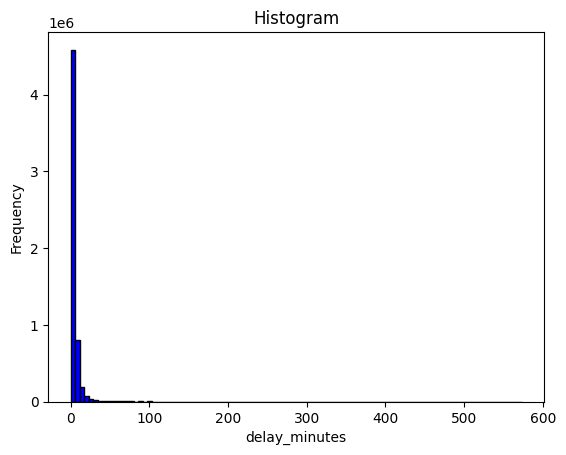

In [17]:
plt.hist(nj_trains['delay_minutes'], bins=100, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('delay_minutes')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

In [26]:
nj_trains.loc[:, 'date'] = pd.to_datetime(nj_trains['date'], errors='coerce')
nj_trains.loc[:, 'scheduled_time'] = pd.to_datetime(nj_trains['scheduled_time'], errors='coerce')
nj_trains.loc[:, 'actual_time'] = pd.to_datetime(nj_trains['actual_time'], errors='coerce')

In [31]:
print(nj_trains['delay_minutes'].groupby(nj_trains['line']).median())

line
Atl. City Line       2.083333
Bergen Co. Line      2.216667
Gladstone Branch     2.133333
Main Line            3.016667
Montclair-Boonton    3.000000
Morristown Line      2.416667
No Jersey Coast      3.033333
Northeast Corrdr     2.183333
Pascack Valley       2.200000
Princeton Shuttle    0.000000
Raritan Valley       2.266667
Name: delay_minutes, dtype: float64


In [ ]:
plt.hist(nj_trains['delay_minutes'], bins=100, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('delay_minutes')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

In [ ]:
plt.plot( 'x', 'y', "", data=df, linestyle='', marker='o', alpha = 0.7, markersize=0.7)
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Try to reduce the dot size', loc='left')
plt.show()

In [63]:
X= train_rain[["day_of_week", 'Rainfall', "line"]]
y= train_rain["delay_minutes"]

## Models

In [65]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform= "pandas")


In [72]:
# Ridge model

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha= 1))]
)

X_transformed = ct.fit_transform(X)

lr_pipeline_1.fit(X, y)
y_pred = lr_pipeline_1.predict(X)
r2 = r2_score(y, y_pred)
print(f"r^2: {r2}")

cross_val_r2 = cross_val_score(lr_pipeline_1, X, y, cv=KFold(n_splits=5), scoring='r2').mean()
print(f"Cross Val r^2: {cross_val_r2}")

ridge_model = Ridge(alpha=1)
ridge_model.fit(X_transformed, y)
print("Intercept:", ridge_model.intercept_)
#print("Coefficients:", ridge_model.coef_)
ridge_coefs = ridge_model.coef_

r^2: 0.03846854649992193
Cross Val r^2: 0.00363013687491025
Intercept: 4.449381861300066


In [71]:
# OLS Pipeline
ols_pipeline = Pipeline(
  [("preprocessing", ct),
   ("ols", LinearRegression())]  # Instantiate LinearRegression properly
)

# Fit the model using the transformed features
ols_pipeline.fit(X, y)

# Predictions and evaluation
y_pred = ols_pipeline.predict(X)
r2 = r2_score(y, y_pred)
print(f"R^2: {r2}")

# Cross-validation using KFold for regression
cross_val_r2 = cross_val_score(ols_pipeline, X, y, cv=KFold(n_splits=5), scoring='r2').mean()
print(f"Cross Val R^2: {cross_val_r2}")



R^2: 0.0384684567375464
Cross Val R^2: -357697677764669.7


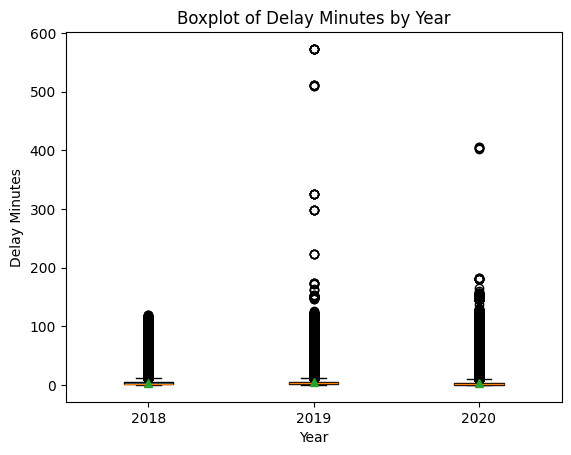

In [83]:
import matplotlib.pyplot as plt

# Group data by 'year'
years = train_rain['Year'].unique()  # Get unique years
data = [train_rain[train_rain['Year'] == year]['delay_minutes'] for year in years]

# Create the boxplot
plt.boxplot(data, patch_artist=True, showmeans=True)

# Customize the plot
plt.title("Boxplot of Delay Minutes by Year")
plt.xlabel("Year")
plt.ylabel("Delay Minutes")
plt.xticks(ticks=range(1, len(years) + 1), labels=years)  # Set year labels for x-axis

# plt.ylim([0,10])
# Show the plot
plt.show()


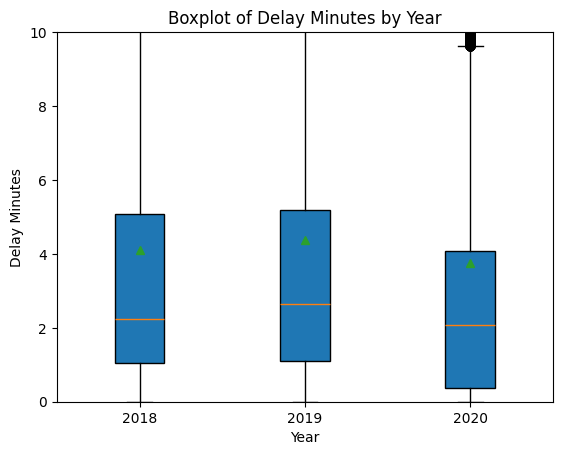

In [82]:
import matplotlib.pyplot as plt

# Group data by 'year'
years = train_rain['Year'].unique()  # Get unique years
data = [train_rain[train_rain['Year'] == year]['delay_minutes'] for year in years]

# Create the boxplot
plt.boxplot(data, patch_artist=True, showmeans=True)

# Customize the plot
plt.title("Boxplot of Delay Minutes by Year")
plt.xlabel("Year")
plt.ylabel("Delay Minutes")
plt.xticks(ticks=range(1, len(years) + 1), labels=years)  # Set year labels for x-axis

plt.ylim([0,10])
# Show the plot
plt.show()


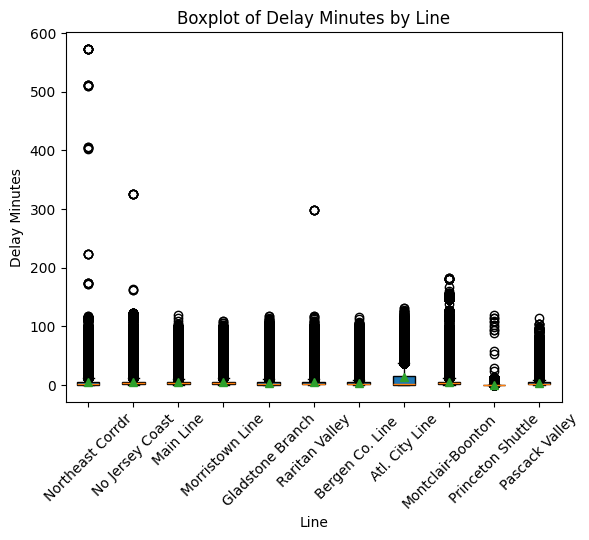

In [87]:
line = train_rain['line'].unique()  # Get unique years
data = [train_rain[train_rain['line'] == year]['delay_minutes'] for year in years]

# Create the boxplot
plt.boxplot(data, patch_artist=True, showmeans=True)

# Customize the plot
plt.title("Boxplot of Delay Minutes by Line")
plt.xlabel("Line")
plt.ylabel("Delay Minutes")
plt.xticks(ticks=range(1, len(line) + 1), labels=years, rotation= 45)  # Set year labels for x-axis


# Show the plot
plt.show()